<a href="https://colab.research.google.com/github/EdgarGM20/Recursos/blob/main/Kaggle_comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
#!pip install -U imbalanced-learn
#!pip install pandas==1.3.5
#!pip install missingno
#Librerias generales de manejo de archivos
import pandas as pd
import numpy as np

# Libreria auxiliar para revisión de datos faltantes
import missingno as msno

# Librerias para gráficos y visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para preprocesamiento y codificación
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Partición de muestra en entrenamiento y test
from sklearn.model_selection import train_test_split

# Métodos de imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

# Modelos predictivos
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelos de selección de variables
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif


# Métricas para evaluación de desempeño
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


**Lectura de datos y visualización del dataset y sus componentes**

In [ ]:
df_train = pd.read_excel('/content/drive/MyDrive/Data/Train.xlsx')
df_test = pd.read_excel('/content/drive/MyDrive/Data/Test.xlsx')
#datos = pd.DataFrame(datos)
df_train.head()
df_test.head()

,ACTIVOS,TAMA¥O,TIPO.COMERCIO,REGION,ZONA,B11,B12,B13,B14,B21,...,B67,B68,B69,B610,B611,A1,A2,A3,A4,A5
0,1094.813592,PEQUE¥A,POR MAYOR,VALLE,OTRAS,-0.021526,-0.032418,-0.054478,-0.080060,0.019397,...,0.395125,0.663994,0.057835,3.837237,2.580051,0.624669,0.358935,0.065297,1.469583,1.506037
1,1368.706796,PEQUE¥A,POR MAYOR,BOGOTA D.C.,CAPITAL,0.013937,0.022078,0.085904,0.029715,0.054482,...,0.162235,0.631242,0.195862,3.385422,-0.784202,0.233104,0.333126,0.086309,0.345911,1.584179
2,4440.085437,PEQUE¥A,POR MENOR,SANTANDER,OTRAS,-0.006423,-0.021329,-0.077236,-0.029466,0.017213,...,0.083155,0.301119,0.074051,1.241192,-0.874639,0.086758,0.066302,0.090746,0.381509,3.320948
3,3112.401942,PEQUE¥A,POR MAYOR,CUNDINAMARCA,CAPITAL,-0.022739,-0.023294,-0.031462,-0.089729,0.029696,...,0.722744,0.976162,0.036933,1.302547,0.379837,0.225782,0.000000,0.051848,2.851979,1.024420
4,9423.293204,MEDIANA,POR MAYOR,ANTIOQUIA,OTRAS,0.056805,0.032271,0.050953,0.088015,0.013595,...,1.114860,1.760261,0.350952,1.503872,0.803586,0.667873,0.000000,0.014125,1.727393,0.568098


In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FRACASO        2000 non-null   int64  
 1   ACTIVOS        2000 non-null   float64
 2   TAMA¥O         2000 non-null   object 
 3   TIPO.COMERCIO  2000 non-null   object 
 4   REGION         2000 non-null   object 
 5   ZONA           2000 non-null   object 
 6   B11            1981 non-null   float64
 7   B12            2000 non-null   float64
 8   B13            2000 non-null   float64
 9   B14            2000 non-null   float64
 10  B21            1981 non-null   float64
 11  B22            2000 non-null   float64
 12  B23            2000 non-null   float64
 13  B24            2000 non-null   float64
 14  B31            2000 non-null   float64
 15  B32            2000 non-null   float64
 16  B33            2000 non-null   float64
 17  B41            2000 non-null   float64
 18  B42     

In [ ]:
# Lectura y descripción de algunas variables en el dataframe
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
FRACASO,2000.0,0.044500,0.206255,0.000000,0.000000,0.000000,0.000000,1.000000
ACTIVOS,2000.0,6955.311116,5991.138061,509.343689,2542.563107,4807.510680,9470.414563,29953.584470
B11,1981.0,-0.019246,0.676537,-29.432146,-0.014491,0.000584,0.015336,2.438964
B12,2000.0,-0.003072,0.077618,-0.754133,-0.020065,0.000754,0.022424,0.445175
B13,2000.0,0.009022,0.444655,-3.268558,-0.046763,0.002018,0.055711,11.003726
B14,2000.0,-0.133080,4.542799,-201.403626,-0.040875,0.001322,0.043565,1.956962
B21,1981.0,-0.061784,2.897712,-127.555076,0.007942,0.025322,0.051070,2.150315
B22,2000.0,0.035501,0.142783,-3.243274,0.011459,0.034659,0.076109,0.580474
B23,2000.0,0.086187,1.559707,-31.460777,0.029349,0.089359,0.175996,49.010691
B24,2000.0,-0.068926,7.623879,-339.363636,0.018906,0.067403,0.173355,11.682408


In [ ]:
df_train.describe(include=[object]).T

,count,unique,top,freq
TAMA¥O,2000,2,PEQUE¥A,1034
TIPO.COMERCIO,2000,2,POR MAYOR,1256
REGION,2000,6,BOGOTA D.C.,1262
ZONA,2000,2,CAPITAL,1360


In [ ]:
# Conteo de datos faltantes por columna
df_train.isna().sum()

FRACASO           0
ACTIVOS           0
TAMA¥O            0
TIPO.COMERCIO     0
REGION            0
ZONA              0
B11              19
B12               0
B13               0
B14               0
B21              19
B22               0
B23               0
B24               0
B31               0
B32               0
B33               0
B41               0
B42               0
B43               0
B44               0
B51               2
B52               2
B53               2
B61              19
B62              19
B63              19
B64              19
B65              19
B66              19
B67              19
B68              19
B69               5
B610              5
B611              5
A1                0
A2                0
A3                0
A4                0
A5                0
dtype: int64

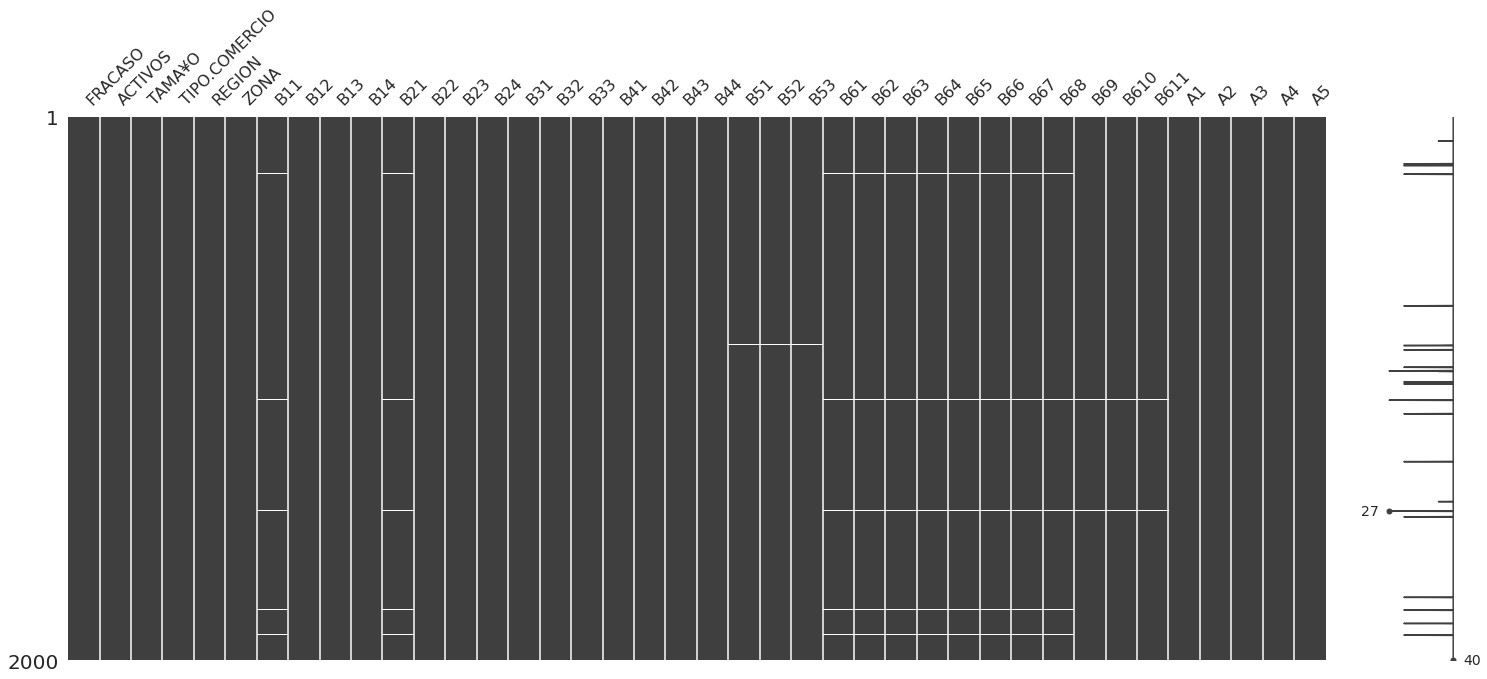

In [ ]:
# Matriz de datos faltantes
msno.matrix(df_train)
plt.show()

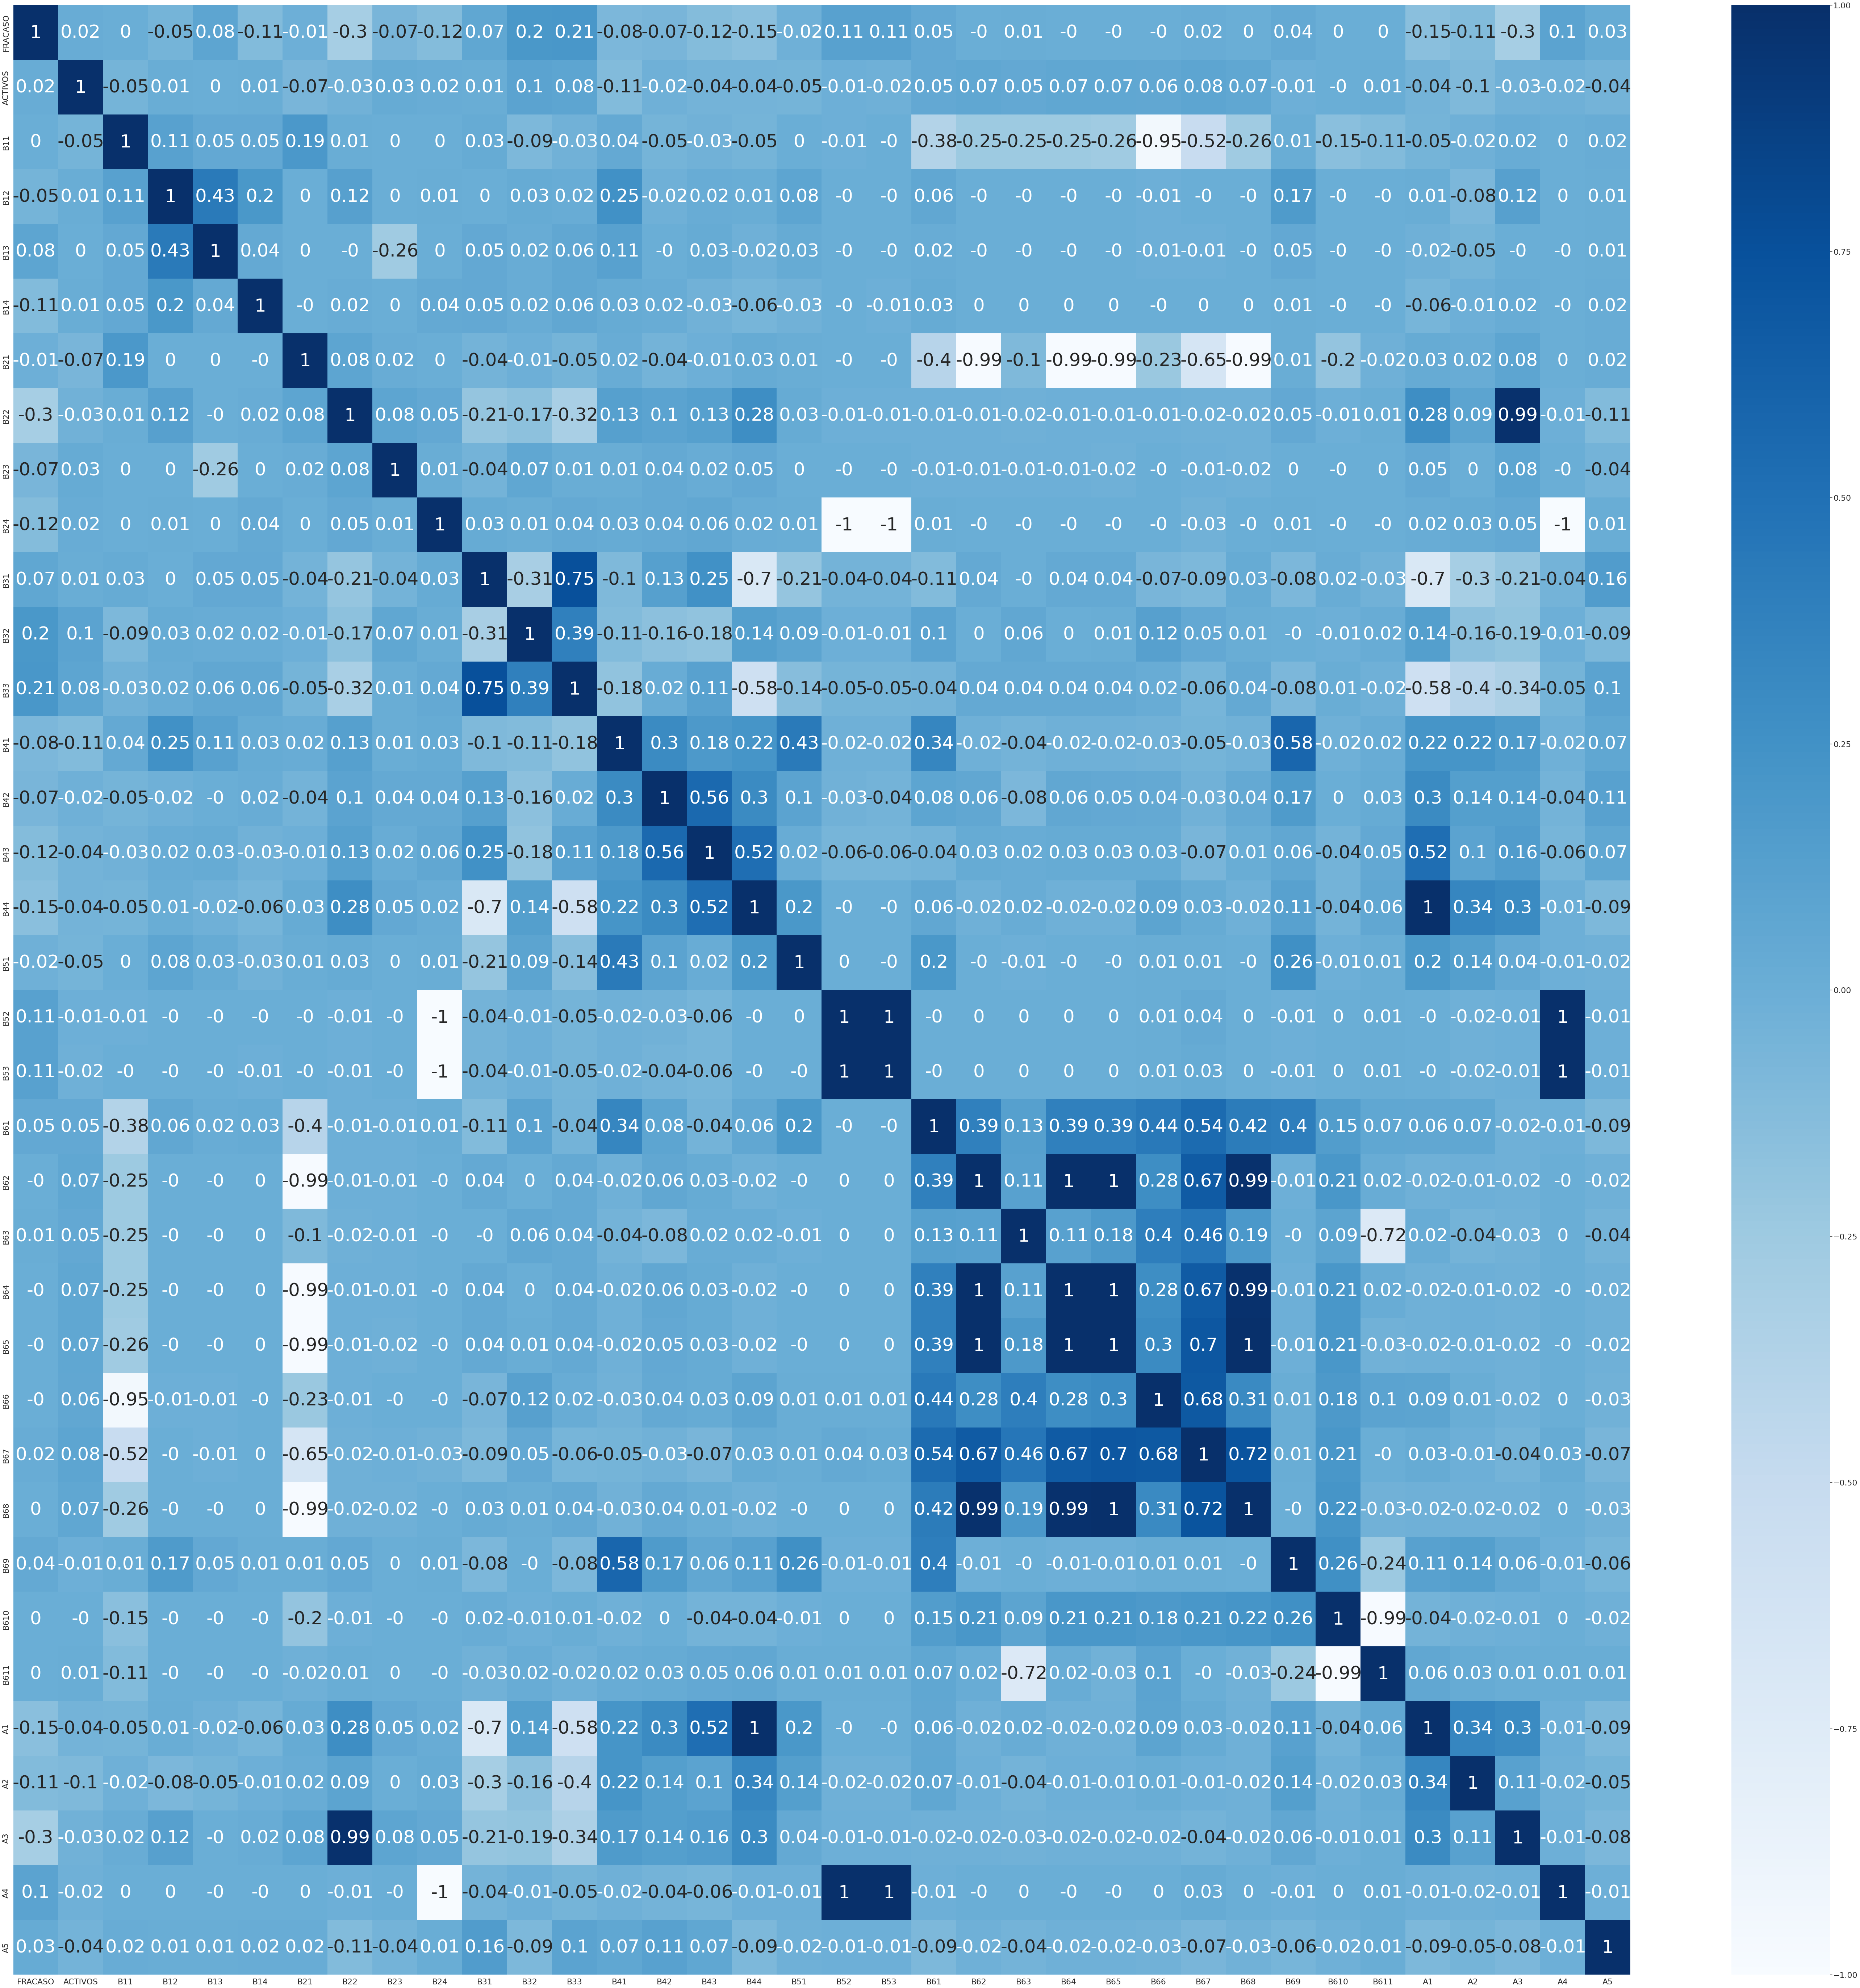

In [ ]:
# Correlograma de variables

plt.figure(figsize=(100, 100))
corr = df_train.corr()
sns.heatmap(round(corr,2), annot=True, cmap="Blues", annot_kws={'size': 50})
plt.show()

Index(['B21', 'A5'], dtype='object')


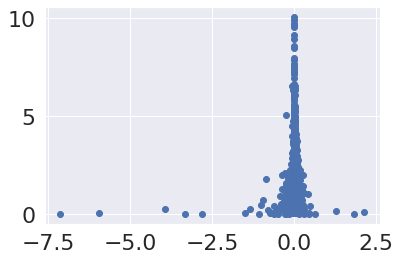

In [ ]:
import scipy.stats as stats
dt = df_train.iloc[:,[10,39]]
print(dt.columns)
z = np.abs(stats.zscore(dt,nan_policy='omit'))
dc = dt[(z<3) .all (axis = 1)]

plt.scatter(dc.iloc[:,0], dc.iloc[:,1], c=['b'])

89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


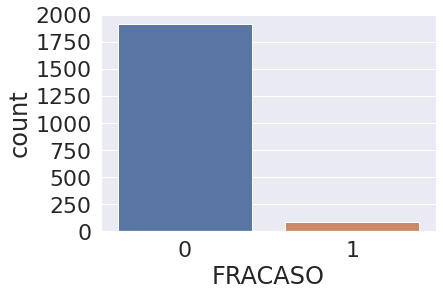

In [ ]:
# Se realiza un preprocesamiento de los datos en el que se cambia el texto por un número a cada clase
#df_train['Class'] = LabelEncoder().fit_transform(df['Class'])
print (df_train['FRACASO'].sum())
plt.figure()
sns.countplot(df_train.FRACASO)
sns.set()
plt.show()

**Gestión de datos faltantes**

In [ ]:
df_train['TAMA¥O'] = LabelEncoder().fit_transform(df_train['TAMA¥O'])
df_train['TIPO.COMERCIO'] = LabelEncoder().fit_transform(df_train['TIPO.COMERCIO'])
df_train['REGION'] = LabelEncoder().fit_transform(df_train['REGION'])
df_train['ZONA'] = LabelEncoder().fit_transform(df_train['ZONA'])

XTotal = df_train.loc[:,df_train.columns!="FRACASO"].to_numpy() 
yTotal = df_train.loc[:,df_train.columns=="FRACASO"].to_numpy()


#Partimos los datasets en Train y Test

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(XTrain)

XTrainImputado=pd.DataFrame(imp.transform(XTrain))
XTestImputado=pd.DataFrame(imp.transform(XTest))

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


 **Estimación de modelo de clasificación - SIN BALANCEAR CLASES**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El error de clasificación para Naive Bayes en la muestra de test es:
0.8787878787878696
Matriz de confusión:
[[ 54 574]
 [  6  26]]
Accuracy:
0.12121212121212122
Precision:
0.043333333333333335
AUC:
0.6292048168789809


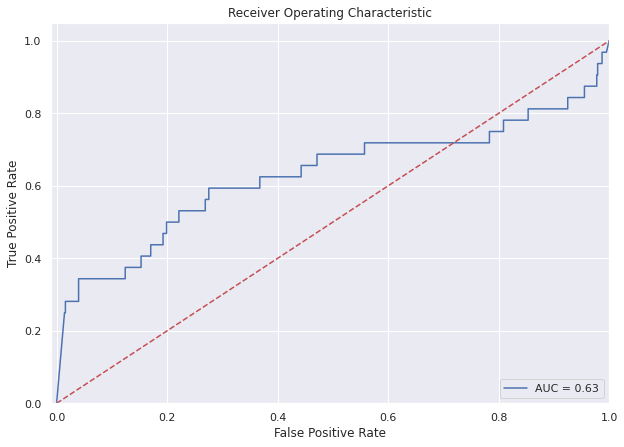

In [ ]:
## Naive Bayes

clfNB = GaussianNB()
clfNB.fit(XTrainImputado, yTrain)

prediccionesNB = clfNB.predict(XTestImputado)
prediccionesProbNB = clfNB.predict_proba(XTestImputado)

errorNB=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesNB[i]):
        errorNB+=1/len(yTest)
        
print('El error de clasificación para Naive Bayes en la muestra de test es:')
print(errorNB)

print('Matriz de confusión:')
print(confusion_matrix(y_true=yTest, y_pred=prediccionesNB))

print('Accuracy:')
accuracyQDA=accuracy_score(y_true=yTest, y_pred=prediccionesNB)
print(accuracyQDA)

print('Precision:')
precisionQDA=precision_score(y_true=yTest, y_pred=prediccionesNB)
print(precisionQDA)

plt.subplots(figsize=(10,7))

fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbNB[:,1])
AUCNaiveBayes=metrics.auc(fpr, tpr)

print('AUC:')
print(AUCNaiveBayes)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCNaiveBayes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


El error de clasificación para QDA en la muestra de test es:
0.0924242424242424
Matriz de confusión:
[[591  37]
 [ 24   8]]
Accuracy:
0.9075757575757576
Precision:
0.17777777777777778
AUC:
0.4831060907643312


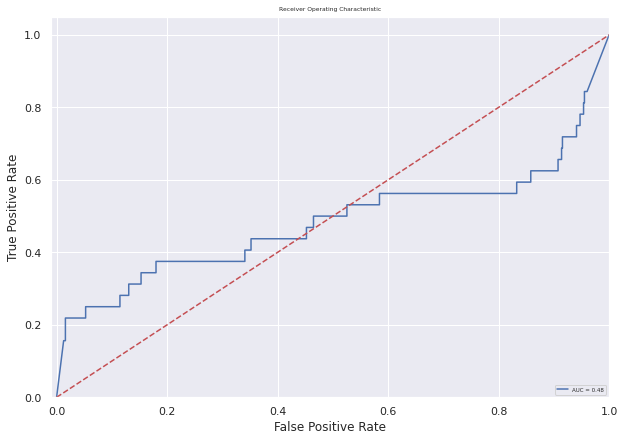

In [ ]:
## QDA

clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrainImputado, yTrain)

prediccionesQDA=clfQDA.predict(XTestImputado)
prediccionesProbQDA=clfQDA.predict_proba(XTestImputado)

errorQDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)
        
print('El error de clasificación para QDA en la muestra de test es:')
print(errorQDA)

print('Matriz de confusión:')
print(confusion_matrix(y_true=yTest, y_pred=prediccionesQDA))

print('Accuracy:')
accuracyQDA=accuracy_score(y_true=yTest, y_pred=prediccionesQDA)
print(accuracyQDA)

print('Precision:')
precisionQDA=precision_score(y_true=yTest, y_pred=prediccionesQDA)
print(precisionQDA)

fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbQDA[:,1], pos_label=1)
AUCQDA=metrics.auc(fpr, tpr)

print('AUC:')
print(AUCQDA)

plt.subplots(figsize=(10,7))
sns.set(font_scale=0.5)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCQDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

 **Estimación de modelo de clasificación - BALANCEANDO CLASES**

Frequency of unique values of the said array:
[[   0    1]
 [1283 1283]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


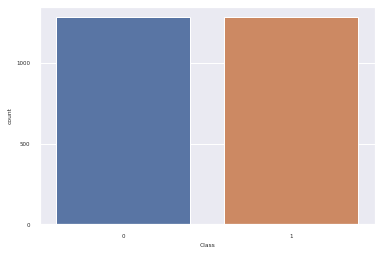

In [ ]:
#Procedimiento SMOTE para imputaciónm en datos desbalanceados
sm = SMOTE()  
XTrain_res, yTrain_res = sm.fit_resample(XTrainImputado, yTrain)

#Matriz de cantidad por clase
unique_elements, counts_elements = np.unique(yTrain_res, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

#Grafica catidades por Clase
plt.figure()
sns.countplot(pd.DataFrame(yTrain_res, columns = ['Class']).Class)
sns.set(font_scale = 2)
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Matriz de confusión:
[[608  20]
 [ 24   8]]
Accuracy:
0.9333333333333333
Precision:
0.2857142857142857
El error de clasificación para RF en la muestra de test es:
0.06666666666666671


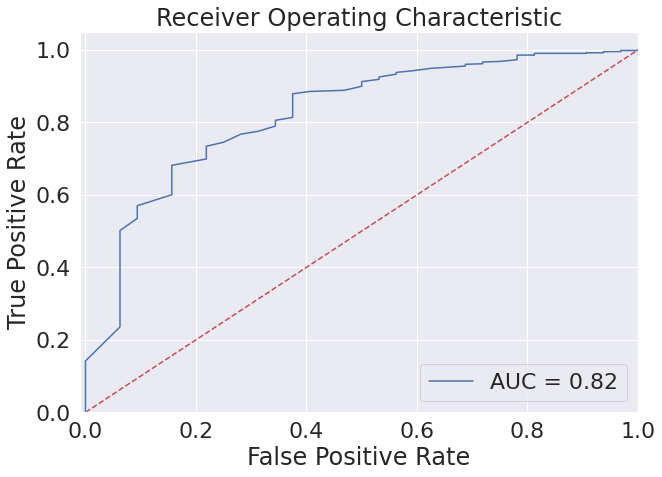

AUC:
0.8229249601910827


In [ ]:
# RF

clfRF = RandomForestClassifier(random_state=0 ,verbose = 1)
clfRF.fit(XTrain_res, yTrain_res)

prediccionRF=clfRF.predict_proba(XTestImputado)[:,0]
y_pred=clfRF.predict(XTestImputado)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)

print('Matriz de confusión:')
print(confusion_matrix(y_true=yTest, y_pred=y_pred))

print('Accuracy:')
accuracyRF=accuracy_score(y_true=yTest, y_pred=y_pred)
print(accuracyRF)

print('Precision:')
precisionRF=precision_score(y_true=yTest, y_pred=y_pred)
print(precisionRF)

errorRF=0
for i in range(0,len(yTest)):
    if(yTest[i]!=y_pred[i]):
        errorRF+=1/len(yTest)
        
print('El error de clasificación para RF en la muestra de test es:')
print(errorRF)

plt.subplots(figsize=(10,7))
sns.set(font_scale=2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('AUC:')
print(AUCRF)

In [ ]:
def seleccion_predictores(feat, XTrain_res, yTrain_res, XTestImputado):
  # SELECCIÓN DE VARIABLES usando métodos de envoltura
  estimator = RandomForestClassifier(random_state = 0)  #se usa random Forest como el algoritmo predictivo
  selector = RFE(estimator, n_features_to_select=feat, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
  selector = selector.fit(XTrain_res, yTrain_res) # esto puede tardar algunos minutos
  #print(seleccion_predictores(XTrain_res, yTrain_res)) 
  u = selector.support_
  arreglo=[] #arreglo para guardar los predictores seleccionados
  for j in range(len(u)): #iteramos sobre el número de predictores y los resultados del RFE
    if (u[j]):
      arreglo.append(j)

  #Aplicamos el nuevo Train y Test con los predictores seleccionados en la corrida
  XTrain_sel = XTrain_res.iloc[:,arreglo]
  XTest_sel = XTestImputado.iloc[:,arreglo]
  
  return XTrain_sel, XTest_sel, arreglo

In [ ]:
# SELECCIÓN DE VARIABLES usando métodos de envoltura
XTrain4, XTest4, arr= seleccion_predictores(19, XTrain_res, yTrain_res, XTestImputado)
   
#Aplicamos el modelo de RF sobre el test de entrenamiento
clf4 = RandomForestClassifier(random_state = 0)
clf4.fit(XTrain4, yTrain_res)
    
#Corremos el modelo sobre el test de prueba
predicciones4 = clf4.predict(XTest4)
prediccionesProb4 = clf4.predict_proba(XTest4)
    
#Calculamos el AUC de la corrida actual
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb4[:,1], pos_label=1)
AUC=metrics.auc(fpr, tpr)
print("AUC: ", AUC)

#maximo = max(AUC) #maximo AUC
print("máximo AUC obtenido: ", AUC)
indice = 18#.index(maximo) #indice del maximo AUC que refleja el número de features óptimo según el AUC
print("Número de predictores óptimos: " + str(indice+1)) #Número de predictores óptimos
arreglo_best = arr #seleccionamos el conjunto de predictores que hacen el AUC optimo
print("Los predictores seleccionados son: ")
print(arreglo_best)


AUC:  0.8304388933121019
máximo AUC obtenido:  0.8304388933121019
Número de predictores óptimos: 19
Los predictores seleccionados son: 
[0, 2, 3, 4, 9, 10, 11, 12, 15, 16, 20, 24, 27, 30, 34, 35, 36, 37, 38]


In [ ]:
def seleccion_predictores_generalizado(XTrain_res, yTrain_res, XTestImputado):
  # Haremos un bucle para calibrar en función al número de predictores a seleccionar (n_features_to_select)
  arreglo_AUC =[] #arreglo para almacenar el AUC de cada corrida
  arreglo_predictoras=[] #arreglo para almacenar los predictores seleccionados en cada corrida
  n_var = np.shape(XTrain_res)[1]
  for i in range(n_var):
    #print(i)
    XTrain_, XTest_, arreglo_= seleccion_predictores(i+1, XTrain_res, yTrain_res, XTestImputado)
    arreglo_predictoras.append(arreglo_) #almacenamos los predictores seleccionados de la corrida actual

    #Aplicamos el modelo de RF sobre el test de entrenamiento
    clf = RandomForestClassifier(random_state = 0)
    clf.fit(XTrain_, yTrain_res)
      
    #Corremos el modelo sobre el test de prueba
    predicciones = clf.predict(XTest_)
    prediccionesProb = clf.predict_proba(XTest_)
      
    #Calculamos el AUC de la corrida actual
    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:,1], pos_label=1)
    AUC=metrics.auc(fpr, tpr)

    #Almacenamos el AUC de la corrida actual
    arreglo_AUC.append(AUC)

  #plt.plot(arreglo_AUC)
  maximo = max(arreglo_AUC) #maximo AUC
  print("máximo AUC obtenido: ", maximo)
  indice = arreglo_AUC.index(maximo) #indice del maximo AUC que refleja el número de features óptimo según el AUC
  print("Número de predictores óptimos: " + str(indice+1)) #Número de predictores óptimos
  arreglo_best = arreglo_predictoras[indice] #seleccionamos el conjunto de predictores que hacen el AUC optimo
  print("Los predictores seleccionados son: ")
  print(arreglo_best)

  #Finalmente Aplicamos el nuevo Train y Test con los predictores seleccionados que hacen el AUC optimo
  XTrain_sel = XTrain_res.iloc[:,arreglo_best]
  XTest_sel = XTestImputado.iloc[:,arreglo_best]

  return XTrain_sel, XTest_sel, arreglo_best

In [ ]:
#XTrain_sel, XTest_sel, arreglo_best = seleccion_predictores_generalizado(XTrain_res, yTrain_res, XTestImputado)
XTrain_sel, XTest_sel, arreglo_best = seleccion_predictores_generalizado(XTrainImputado, yTrain, XTestImputado)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

máximo AUC obtenido:  0.8946058917197452
Número de predictores óptimos: 19
Los predictores seleccionados son: 
[0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 23, 25, 29, 31, 34, 36, 37, 38]


In [ ]:
def some_stats(yTest, y_pred, fpr, tpr, AUC):
  print('Matriz de confusión:')
  print(confusion_matrix(y_true=yTest, y_pred=y_pred))

  print('Accuracy:')
  accuracyRF=accuracy_score(y_true=yTest, y_pred=y_pred)
  print(accuracyRF)

  print('Precision:')
  precisionRF=precision_score(y_true=yTest, y_pred=y_pred)
  print(precisionRF)

  errorRF=0
  for i in range(0,len(yTest)):
      if(yTest[i]!=y_pred[i]):
          errorRF+=1/len(yTest)
          
  print('El error de clasificación en la muestra de test es:')
  print(errorRF)

  plt.subplots(figsize=(10,7))
  sns.set(font_scale=2)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([-0.01, 1])
  plt.ylim([0, 1.05])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  print('AUC:')
  print(AUCRF)

Matriz de confusión:
[[604  24]
 [ 26   6]]
Accuracy:
0.9242424242424242
Precision:
0.2
El error de clasificación en la muestra de test es:
0.07575757575757577


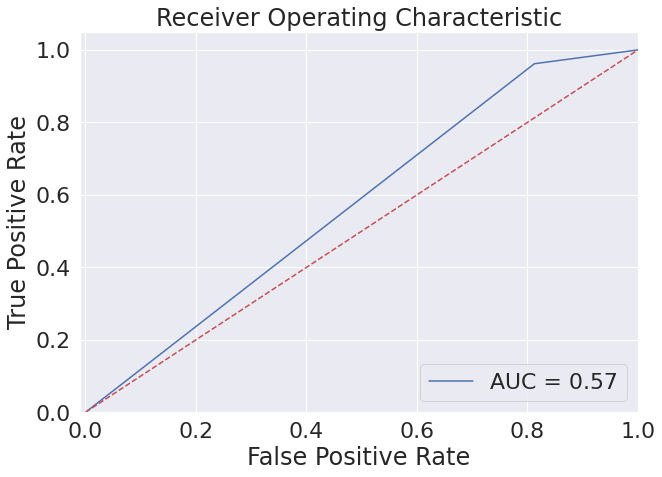

AUC:
0.8229249601910827


In [ ]:
arreglo_best = [0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 23, 25, 29, 31, 34, 36, 37, 38]

XTrain_sel_t = XTrainImputado.iloc[:,arreglo_best] #XTrainImputado
XTest_sel_t = XTestImputado.iloc[:,arreglo_best]
#clfBag = comparacion_ensamblajes(XTrain_sel_t, XTest_sel_t, yTrain_res, yTest) #yTrain
#comparacion_ensamblajes(XTrain_sel_t, XTest_sel_t, yTrain, yTest) #clfBag = 

XTrain = XTrain_sel_t
XTest = XTest_sel_t

# Modelo basado en árboles
from sklearn.tree import DecisionTreeClassifier

#Modelos de ensamblaje
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Arbol
clfTree = DecisionTreeClassifier()
clfTree.fit(XTrain, yTrain)
prediccionTree=clfTree.predict_proba(XTest)[:,0]
y_pred  =clfTree.predict(XTest)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionTree, pos_label=0)
AUCTree=round(metrics.auc(fpr, tpr),3)

some_stats(yTest, y_pred, fpr, tpr, AUCTree)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusión:
[[626   2]
 [ 29   3]]
Accuracy:
0.953030303030303
Precision:
0.6
El error de clasificación en la muestra de test es:
0.04696969696969699


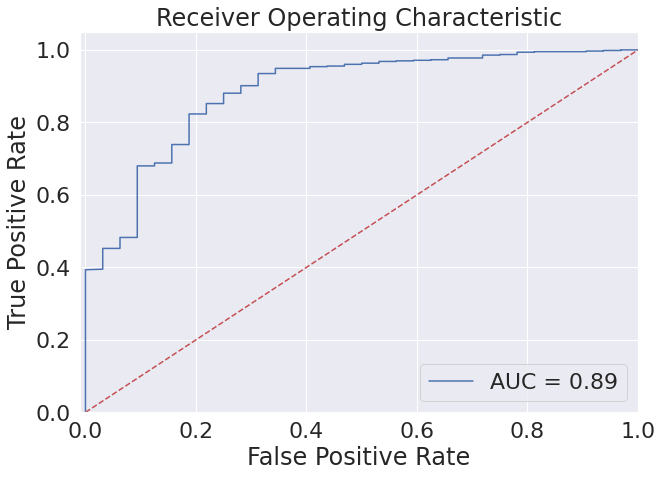

AUC:
0.8229249601910827


In [ ]:
# Bagging
clfBag = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100) # n_estimators=10, random_state=0
clfBag.fit(XTrain, yTrain)
prediccionBag=clfBag.predict_proba(XTest)[:,0]
y_pred  = clfBag.predict(XTest)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionBag, pos_label=0)
AUCBag=round(metrics.auc(fpr, tpr),3)
    
some_stats(yTest, y_pred,fpr, tpr, AUCBag)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Matriz de confusión:
[[626   2]
 [ 28   4]]
Accuracy:
0.9545454545454546
Precision:
0.6666666666666666
El error de clasificación en la muestra de test es:
0.04545454545454547


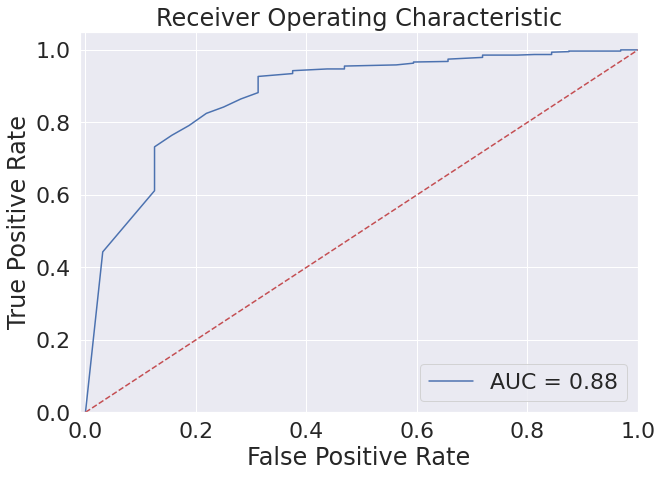

AUC:
0.876


In [ ]:
# Random Forest
clfRF = RandomForestClassifier() # random_state=0
clfRF.fit(XTrain, yTrain)
prediccionRF=clfRF.predict_proba(XTest)[:,0]
y_pred  = clfRF.predict(XTest)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF=round(metrics.auc(fpr, tpr),3)

some_stats(yTest, y_pred,fpr, tpr, AUCRF)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusión:
[[619   9]
 [ 27   5]]
Accuracy:
0.9454545454545454
Precision:
0.35714285714285715
El error de clasificación en la muestra de test es:
0.05454545454545458


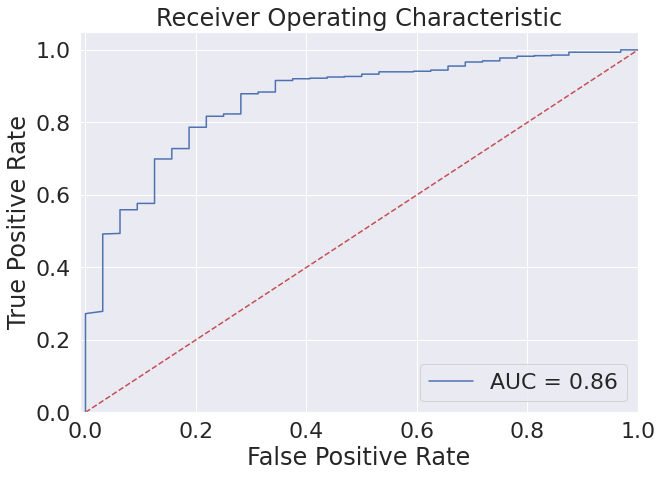

AUC:
0.876


In [ ]:
# Gradient Boosting
clfGB= GradientBoostingClassifier() # learning_rate=1.0,max_depth=1,random_state=0
clfGB.fit(XTrain, yTrain)
prediccionGB=clfGB.predict_proba(XTest)[:,0]
y_pred  = clfGB.predict(XTest)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGB, pos_label=0)
AUCGB=round(metrics.auc(fpr, tpr),3)

some_stats(yTest, y_pred,fpr, tpr, AUCGB)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


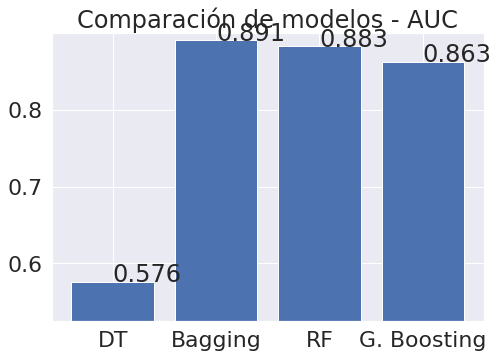

In [ ]:
def comparacion_ensamblajes(XTrain, XTest, yTrain, yTest):
    # Modelo basado en árboles
    from sklearn.tree import DecisionTreeClassifier

    #Modelos de ensamblaje
    from sklearn.ensemble import BaggingClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier

    #Arbol
    clfTree = DecisionTreeClassifier()
    clfTree.fit(XTrain, yTrain)
    prediccionTree=clfTree.predict_proba(XTest)[:,0]
    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionTree, pos_label=0)
    AUCTree=round(metrics.auc(fpr, tpr),3)

    #some_stats(yTest, prediccionTree)

    # Bagging
    clfBag = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100) # n_estimators=10, random_state=0
    clfBag.fit(XTrain, yTrain)
    prediccionBag=clfBag.predict_proba(XTest)[:,0]
    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionBag, pos_label=0)
    AUCBag=round(metrics.auc(fpr, tpr),3)
    
    #some_stats(yTest, prediccionBag,fpr, tpr)

    # Random Forest
    clfRF = RandomForestClassifier() # random_state=0
    clfRF.fit(XTrain, yTrain)
    prediccionRF=clfRF.predict_proba(XTest)[:,0]
    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
    AUCRF=round(metrics.auc(fpr, tpr),3)

    #some_stats(yTest, prediccionRF)

    # Gradient Boosting
    clfGB= GradientBoostingClassifier() # learning_rate=1.0,max_depth=1,random_state=0
    clfGB.fit(XTrain, yTrain)
    prediccionGB=clfGB.predict_proba(XTest)[:,0]
    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGB, pos_label=0)
    AUCGB=round(metrics.auc(fpr, tpr),3)

    #some_stats(yTest, prediccionGB)
    
    AUC = [AUCTree,AUCBag,AUCRF,AUCGB]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title("Comparación de modelos - AUC")
    ejeX = ['DT','Bagging' ,'RF','G. Boosting']
    ejeY = AUC
    plt.ylim(min(AUC)*0.91,max(AUC)*1.01)
    ax.bar(ejeX,ejeY)
    def addlabels(x,y,plotP):
        for i in range(len(x)):
            plotP.text(i,y[i],y[i])
    addlabels(ejeX,ejeY,plt)
    
    plt.show()

    return clfBag

#arreglo_best_mod = [0, 2, 4, 9, 16, 20, 25, 35, 36, 37, 38] #[0, 2, 4, 9, 10, 12, 15, 16, 20, 24, 25, 27, 29, 30, 34, 35, 36, 37, 38]
#arreglo_best_mod = [0,2,3,4,7,8,9,
#                    14,16,18,19,
#                    20,22,
#                    31,33,35,37,38]
#arreglo_best_mod1 = [0, 9, 11, 12, 14, 16, 18, 25, 29, 31, 36, 37, 38]
#arreglo_best_mod2 = [0, 9, 11, 14, 16, 18, 29, 36, 37, 38]
#XTrain_sel_t = XTrain_res.iloc[:,arreglo_best_mod] #XTrainImputado
arreglo_best = [0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 23, 25, 29, 31, 34, 36, 37, 38]

XTrain_sel_t = XTrainImputado.iloc[:,arreglo_best] #XTrainImputado
XTest_sel_t = XTestImputado.iloc[:,arreglo_best]
#clfBag = comparacion_ensamblajes(XTrain_sel_t, XTest_sel_t, yTrain_res, yTest) #yTrain
clfBag = comparacion_ensamblajes(XTrain_sel_t, XTest_sel_t, yTrain, yTest) #

**Resultado de la competencia en Kaggle**

In [ ]:
df_test['TAMA¥O'] = LabelEncoder().fit_transform(df_test['TAMA¥O'])
df_test['TIPO.COMERCIO'] = LabelEncoder().fit_transform(df_test['TIPO.COMERCIO'])
df_test['REGION'] = LabelEncoder().fit_transform(df_test['REGION'])
df_test['ZONA'] = LabelEncoder().fit_transform(df_test['ZONA'])

XTest_kaggle = df_test.loc[:,df_test.columns!="FRACASO"].to_numpy()
XTestImputado_kaggle = pd.DataFrame(imp.transform(XTest_kaggle))


XTestImputado_kaggle_wrapper = XTestImputado_kaggle.iloc[:,arreglo_best_mod2]


# Bagging
prediccionBag_Kaggle_wrapper = clfBag.predict_proba(XTestImputado_kaggle_wrapper)[:,1]
y_pred_wrapper = clfBag.predict(XTestImputado_kaggle_wrapper)
df_prediccionRF_Kaggle_wrapper = pd.DataFrame(prediccionBag_Kaggle_wrapper)
df_prediccionRF_Kaggle_wrapper.columns = ['Probabilidad']
df_prediccionRF_Kaggle_wrapper['Id'] = np.arange(len(df_prediccionRF_Kaggle_wrapper))+1
df_prediccionRF_Kaggle_wrapper.set_index('Id', inplace=True)


# df_prediccionRF_Kaggle
#df_prediccionRF_Kaggle.to_csv('/content/drive/MyDrive/Data/kaggle_submission.csv')
df_prediccionRF_Kaggle_wrapper.to_csv('/content/drive/MyDrive/Data/kaggle_submission_7.csv')

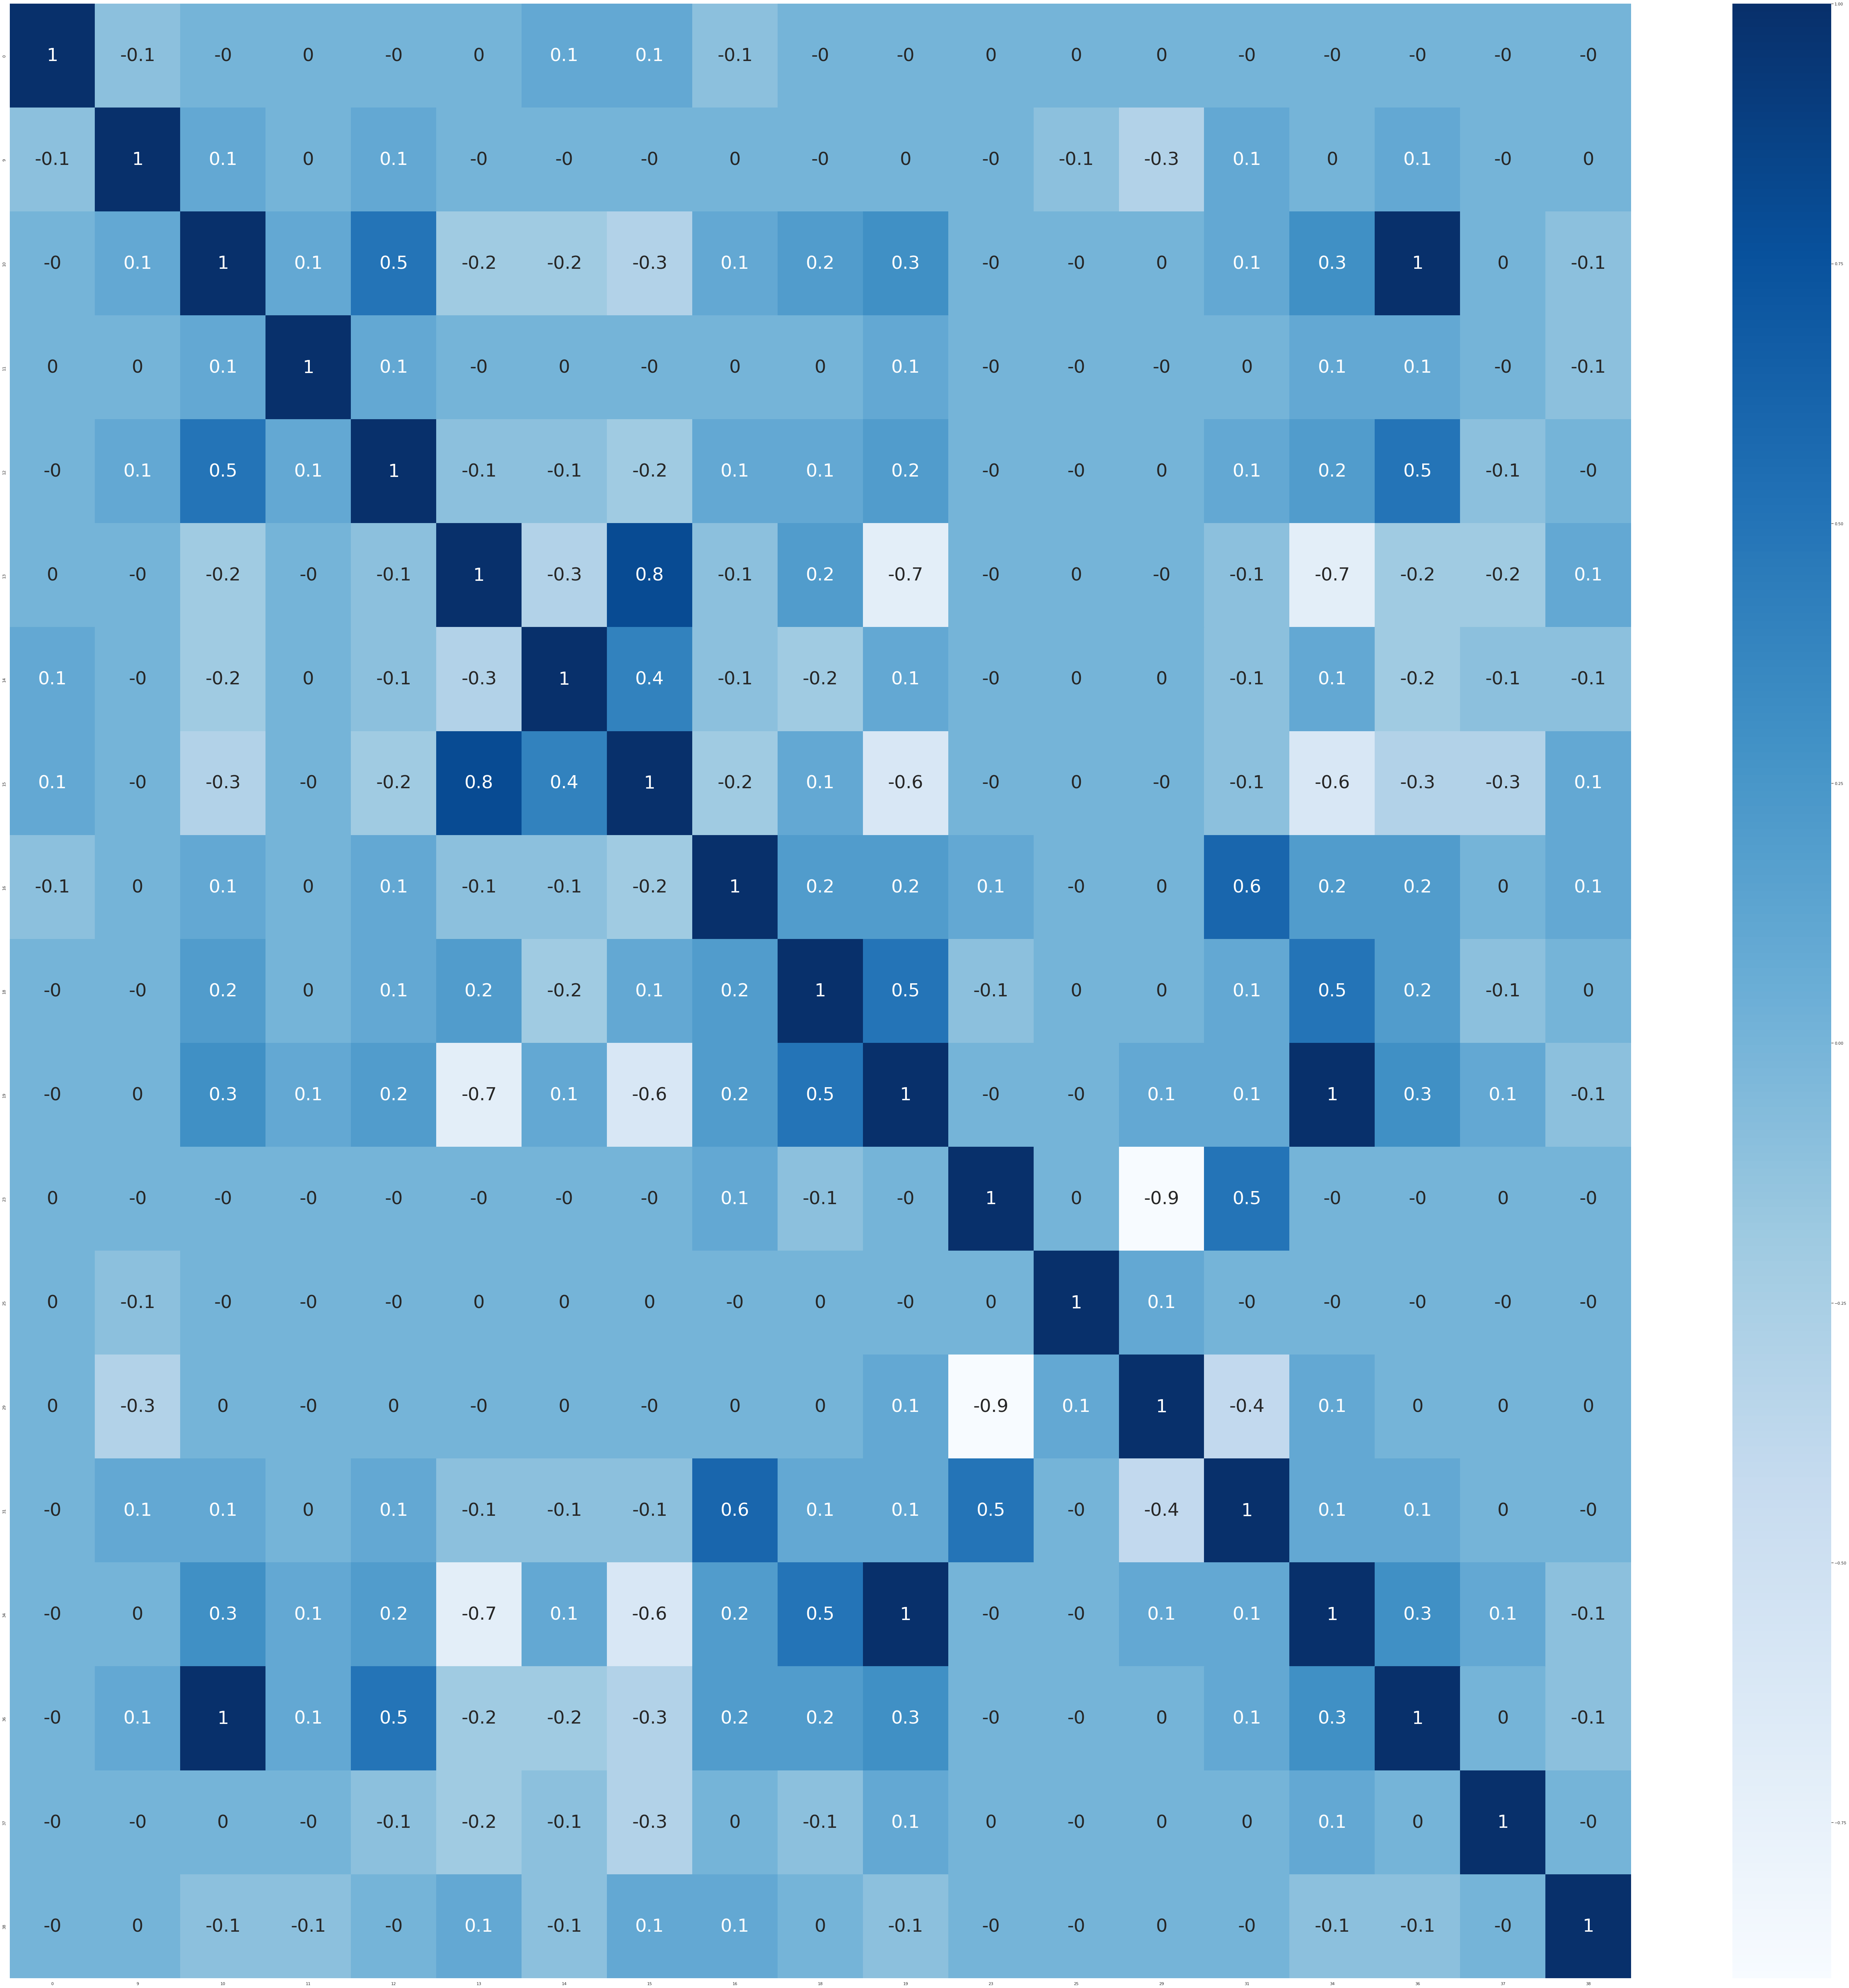

In [ ]:
#arreglo_best_mod = [0, 2, 4, 9, 16, 20, 25, 35, 36, 37, 38] #[0, 2, 4, 9, 10, 12, 15, 16, 20, 24, 25, 27, 29, 30, 34, 35, 36, 37, 38]
#[0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 23, 25, 29, 31, 34, 36, 37, 38]
arreglo_best_mod = [0,2,3,4,7,8,9,
                    14,16,18,19,
                    20,22,
                    31,33,35,37,38]

arreglo_best_mod1 = [0, 9, 11, 14, 16, 18, 29, 36, 37, 38]

#XTrain_sel_ = XTestImputado_kaggle.iloc[:,arreglo_best_mod1]
arreglo_best = [0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 23, 25, 29, 31, 34, 36, 37, 38]
XTrain_sel_ = XTrainImputado.iloc[:,arreglo_best]
#XTrain_sel_ = XTrainImputado.iloc[:,arreglo_best_mod1]

corr = XTrain_sel_.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(round(corr,1), annot=True, cmap="Blues", annot_kws={'size': 50}) #
plt.show()


In [ ]:
df_test['TAMA¥O'] = LabelEncoder().fit_transform(df_test['TAMA¥O'])
df_test['TIPO.COMERCIO'] = LabelEncoder().fit_transform(df_test['TIPO.COMERCIO'])
df_test['REGION'] = LabelEncoder().fit_transform(df_test['REGION'])
df_test['ZONA'] = LabelEncoder().fit_transform(df_test['ZONA'])

XTest_kaggle = df_test.loc[:,df_test.columns!="FRACASO"].to_numpy()
XTestImputado_kaggle = pd.DataFrame(imp.transform(XTest_kaggle))

# Opción 1
prediccionRF_Kaggle = clfRF.predict_proba(XTestImputado_kaggle)[:,1]
y_pred=clfRF.predict(XTestImputado_kaggle)
df_prediccionRF_Kaggle = pd.DataFrame(prediccionRF_Kaggle)
df_prediccionRF_Kaggle.columns = ['Probabilidad']
df_prediccionRF_Kaggle['Id'] = np.arange(len(df_prediccionRF_Kaggle))+1
df_prediccionRF_Kaggle.set_index('Id', inplace=True)

# Opción 2
XTestImputado_kaggle_wrapper = XTestImputado_kaggle.iloc[:,arreglo]
prediccionRF_Kaggle_wrapper = clfRF2.predict_proba(XTestImputado_kaggle_wrapper)[:,1]
y_pred_wrapper = clfRF2.predict(XTestImputado_kaggle_wrapper)
df_prediccionRF_Kaggle_wrapper = pd.DataFrame(prediccionRF_Kaggle_wrapper)
df_prediccionRF_Kaggle_wrapper.columns = ['Probabilidad']
df_prediccionRF_Kaggle_wrapper['Id'] = np.arange(len(df_prediccionRF_Kaggle_wrapper))+1
df_prediccionRF_Kaggle_wrapper.set_index('Id', inplace=True)


# df_prediccionRF_Kaggle
#df_prediccionRF_Kaggle.to_csv('/content/drive/MyDrive/Data/kaggle_submission.csv')
df_prediccionRF_Kaggle_wrapper.to_csv('/content/drive/MyDrive/Data/kaggle_submission_2.csv')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Matriz de confusión:
[[612  16]
 [ 23   9]]
Accuracy:
0.9409090909090909
Precision:
0.36
El error de clasificación para RF en la muestra de test es:
0.05909090909090913


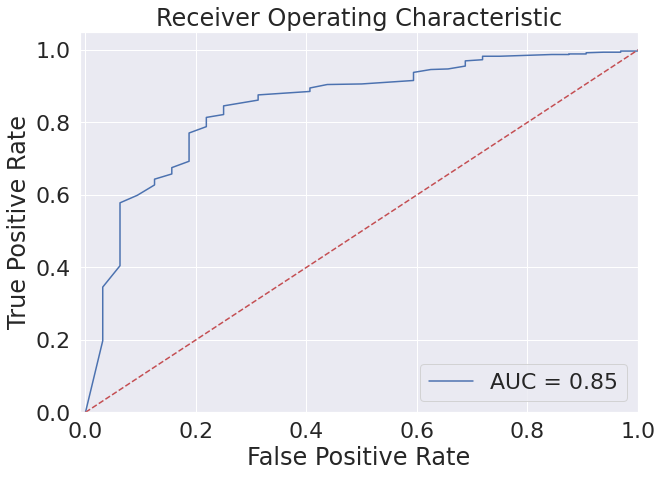

AUC:
0.8470591162420382


In [ ]:
# RF

clfRF2 = RandomForestClassifier(random_state=0 ,verbose = 1)
clfRF2.fit(XTrain2, yTrain_res)

prediccionRF2 = clfRF2.predict_proba(XTest2)[:,0]
y_pred2 = clfRF2.predict(XTest2)
fpr2, tpr2, thresholds2 = metrics.roc_curve(yTest, prediccionRF2, pos_label=0)
AUCRF2 = metrics.auc(fpr2, tpr2)

print('Matriz de confusión:')
print(confusion_matrix(y_true=yTest, y_pred=y_pred2))

print('Accuracy:')
accuracyRF2 = accuracy_score(y_true=yTest, y_pred=y_pred2)
print(accuracyRF2)

print('Precision:')
precisionRF2 = precision_score(y_true=yTest, y_pred=y_pred2)
print(precisionRF2)

errorRF2 = 0
for i in range(0,len(yTest)):
    if(yTest[i]!=y_pred2[i]):
        errorRF2+=1/len(yTest)
        
print('El error de clasificación para RF en la muestra de test es:')
print(errorRF2)

plt.subplots(figsize=(10,7))
sns.set(font_scale=2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % AUCRF2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('AUC:')
print(AUCRF2)

El AUC es: 0.5020899681528662


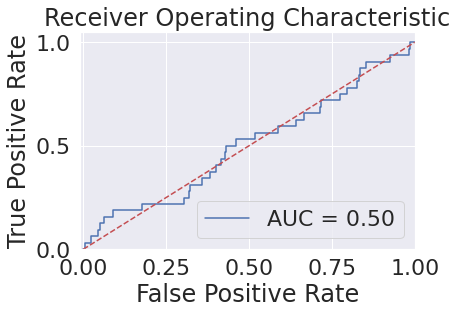

In [ ]:
# SVM

clf_wrapper = SVC(probability=True)
clf_wrapper.fit(XTrain2, yTrain_res)

predicciones_wrapper=clf_wrapper.predict(XTest2)
prediccionesProb_wrapper=clf_wrapper.predict_proba(XTest2)

fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb_wrapper[:,1], pos_label=1)
AUC_wrapper=metrics.auc(fpr, tpr)
print("El AUC es: " + str(AUC_wrapper))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_wrapper)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()